In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation

#plt.style.use('tableau-colorblind10')
sns.set(font_scale=1.3)
%matplotlib widget

## Load data

In [25]:
df = pd.read_table("simulation_params_N8b4c.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','frequency','info_per_agent','int_entropy'])
df

,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy
0,60.593750,85.637466,0.031242,0.044154,0.125000,0.500000,0.250,0.809659
1,65.958281,63.196299,0.051330,0.049180,0.323048,0.166667,1.375,0.776223
2,0.156250,0.162380,0.039062,0.040595,0.000000,1.000000,0.000,0.000000
3,30.382812,80.054964,0.015681,0.041319,0.000000,1.000000,0.000,0.542479
4,76.195312,58.956179,0.078109,0.060437,0.125000,0.500000,0.625,0.881094
...,...,...,...,...,...,...,...,...
896,60.828125,34.831494,0.093557,0.053573,0.198102,0.333333,1.500,0.809659
897,70.804844,59.491003,0.054824,0.046063,0.323048,0.166667,1.125,0.820575
898,84.756250,70.847636,0.055001,0.045975,0.290241,0.200000,1.250,0.923955
899,91.414062,80.296986,0.046939,0.041231,0.125000,0.500000,0.500,0.952529


In [26]:
df['efficiency'].describe()

count    901.000000
mean      61.733337
std       19.150080
min       -0.046875
25%       52.026875
50%       60.953125
75%       75.710938
max      121.906250
Name: efficiency, dtype: float64

In [27]:
#data_f = pd.read_csv("data/MFP_4medidas.csv")
#data_f.head()

In [28]:
#df = data_f[['efficiency','entropy','attendance','inequality']]

In [29]:
#df[(df['efficiency']<201) & (df['inequality']<50) & (df['info_per_agent']<=1)]

In [30]:
#df[(df['efficiency']>201) & (df['inequality']>200) & (df['entropy']<=0.1)]

In [31]:
#Filter out data where all agents choose 0 always or all agents choose 1 always
df = df[df['int_entropy']>0].reset_index()
df

,index,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy
0,0,60.593750,85.637466,0.031242,0.044154,0.125000,0.500000,0.250,0.809659
1,1,65.958281,63.196299,0.051330,0.049180,0.323048,0.166667,1.375,0.776223
2,3,30.382812,80.054964,0.015681,0.041319,0.000000,1.000000,0.000,0.542479
3,4,76.195312,58.956179,0.078109,0.060437,0.125000,0.500000,0.625,0.881094
4,5,91.320312,100.538194,0.046915,0.051651,0.125000,0.500000,0.250,0.952529
...,...,...,...,...,...,...,...,...,...
883,896,60.828125,34.831494,0.093557,0.053573,0.198102,0.333333,1.500,0.809659
884,897,70.804844,59.491003,0.054824,0.046063,0.323048,0.166667,1.125,0.820575
885,898,84.756250,70.847636,0.055001,0.045975,0.290241,0.200000,1.250,0.923955
886,899,91.414062,80.296986,0.046939,0.041231,0.125000,0.500000,0.500,0.952529


## Plot data

<Axes: xlabel='n_efficiency', ylabel='n_inequality'>

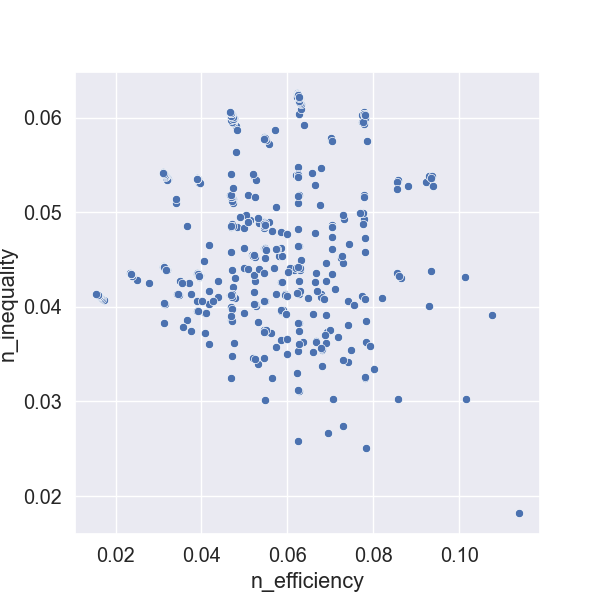

In [32]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df, ax=ax, x='n_efficiency', y='n_inequality')

## Standardize data

In [33]:
#df_std = df[['n_efficiency','n_inequality','entropy','info_per_agent']].apply(lambda x: x-np.mean(x))
#df_std = df_std.apply(lambda x: x/np.std(x))
#df_std.head()

In [34]:
#X_dat = df_std.to_numpy()
#X_dat.shape

In [35]:
df_red = df[['n_efficiency','n_inequality','entropy','info_per_agent']]
scaler = MinMaxScaler()
scaler.fit(df_red)
X_dat = scaler.transform(df_red)
X_dat.shape

(888, 4)

# 2D

## t-sne

In [36]:
lab1 = 'efficiency'
lab2 = 'entropy'
lab3 = 'inequality'
lab4 = 'info_per_agent'

In [37]:
from sklearn.manifold import TSNE

In [38]:
# Get t-sne embeding with 2 dimensions
tsne = TSNE(2,perplexity=30,random_state=123)
tsne_result = tsne.fit_transform(X_dat)
tsne_result.shape

(888, 2)

In [39]:
df_tsne_res = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
df_tsne_res = df_tsne_res.join(df)
df_tsne_res.head()

,tsne_1,tsne_2,index,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy
0,13.422439,-28.064344,0,60.593750,85.637466,0.031242,0.044154,0.125000,0.500000,0.250,0.809659
1,18.738476,3.877815,1,65.958281,63.196299,0.051330,0.049180,0.323048,0.166667,1.375,0.776223
2,-3.539897,-46.435783,3,30.382812,80.054964,0.015681,0.041319,0.000000,1.000000,0.000,0.542479
3,15.629205,27.025101,4,76.195312,58.956179,0.078109,0.060437,0.125000,0.500000,0.625,0.881094
4,-12.097899,-2.296054,5,91.320312,100.538194,0.046915,0.051651,0.125000,0.500000,0.250,0.952529


In [40]:
#df_tsne_res[(df_tsne_res['tsne_1']>-25) & (df_tsne_res['tsne_1']<-5) & (df_tsne_res['tsne_2']>-60) & (df_tsne_res['tsne_2']<-40)]

## Plot results

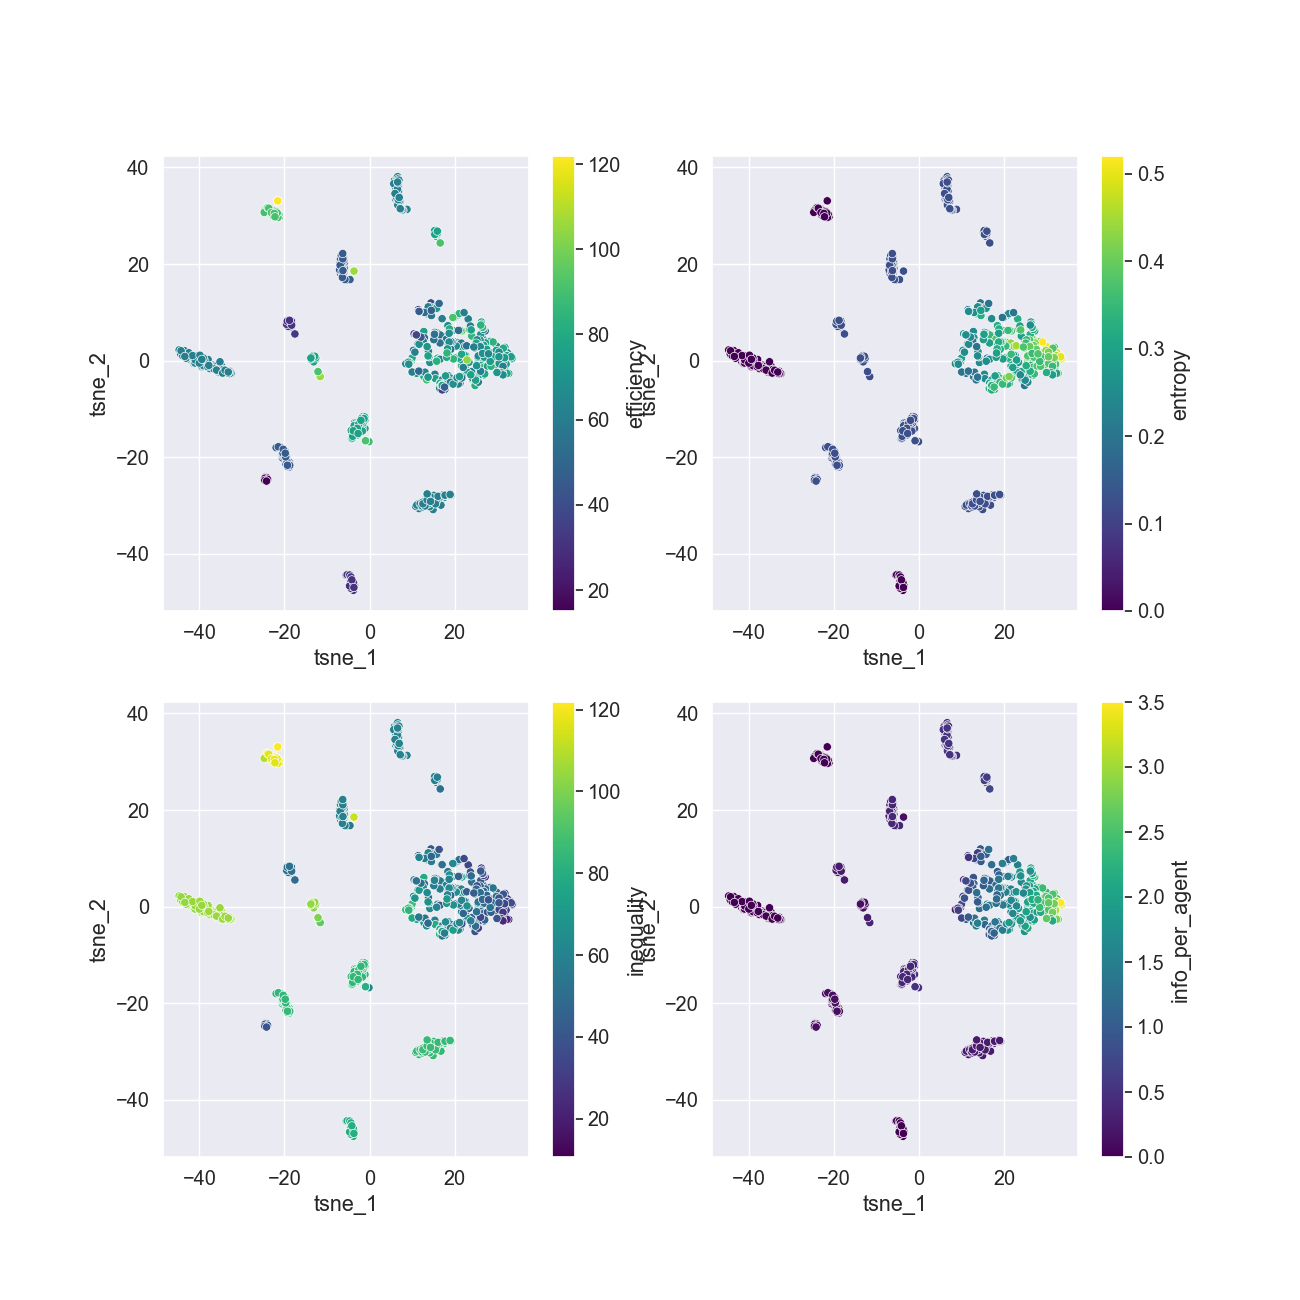

In [41]:
#2D plots
fig1, axis = plt.subplots(nrows=2, ncols=2, figsize=(13,13))

ax1 = sns.scatterplot(data=df_tsne_res, ax=axis[0][0], x='tsne_1', y='tsne_2', hue=lab1, palette='viridis')
norm1 = plt.Normalize(df_tsne_res[lab1].min(), df_tsne_res[lab1].max())
sm1 = plt.cm.ScalarMappable(cmap="viridis", norm=norm1)
sm1.set_array([])
ax1.get_legend().remove()
cb1 = plt.colorbar(mappable=sm1, ax=ax1)
cb1.set_label(lab1)

ax2 = sns.scatterplot(data=df_tsne_res, ax=axis[0][1], x='tsne_1', y='tsne_2', hue=lab2, palette='viridis')
norm2 = plt.Normalize(df_tsne_res[lab2].min(), df_tsne_res[lab2].max())
sm2 = plt.cm.ScalarMappable(cmap="viridis", norm=norm2)
sm2.set_array([])
ax2.get_legend().remove()
cb2 = plt.colorbar(mappable=sm2, ax=ax2)
cb2.set_label(lab2)

ax3 = sns.scatterplot(data=df_tsne_res, ax=axis[1][0], x='tsne_1', y='tsne_2', hue=lab3, palette='viridis')
norm3 = plt.Normalize(df_tsne_res[lab3].min(), df_tsne_res[lab3].max())
sm3 = plt.cm.ScalarMappable(cmap="viridis", norm=norm3)
sm3.set_array([])
ax3.get_legend().remove()
cb3 = plt.colorbar(mappable=sm3, ax=ax3)
cb3.set_label(lab3)

ax4 = sns.scatterplot(data=df_tsne_res, ax=axis[1][1], x='tsne_1', y='tsne_2', hue=lab4, palette='viridis')
norm4 = plt.Normalize(df_tsne_res[lab4].min(), df_tsne_res[lab4].max())
sm4 = plt.cm.ScalarMappable(cmap="viridis", norm=norm4)
sm4.set_array([])
ax4.get_legend().remove()
cb4 = plt.colorbar(mappable=sm4, ax=ax4)
cb4.set_label(lab4)

# 3D

## t-sne

In [42]:
# Get t-sne embeding with 3 dimensions
tsne3 = TSNE(3,perplexity=30,random_state=123)
tsne_result3 = tsne3.fit_transform(X_dat)
tsne_result3.shape

(888, 3)

In [43]:
df_tsne_res3 = pd.DataFrame({'tsne_1': tsne_result3[:,0], 'tsne_2': tsne_result3[:,1], 'tsne_3': tsne_result3[:,2]})
df_tsne_res3 = df_tsne_res3.join(df)
df_tsne_res3.head()

,tsne_1,tsne_2,tsne_3,index,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy
0,3.020380,-13.472863,2.165575,0,60.593750,85.637466,0.031242,0.044154,0.125000,0.500000,0.250,0.809659
1,4.467752,1.201713,2.870112,1,65.958281,63.196299,0.051330,0.049180,0.323048,0.166667,1.375,0.776223
2,-5.642599,-9.611550,-4.404934,3,30.382812,80.054964,0.015681,0.041319,0.000000,1.000000,0.000,0.542479
3,6.989312,9.691623,-2.727754,4,76.195312,58.956179,0.078109,0.060437,0.125000,0.500000,0.625,0.881094
4,-8.262594,3.560276,8.970299,5,91.320312,100.538194,0.046915,0.051651,0.125000,0.500000,0.250,0.952529


## Plot results

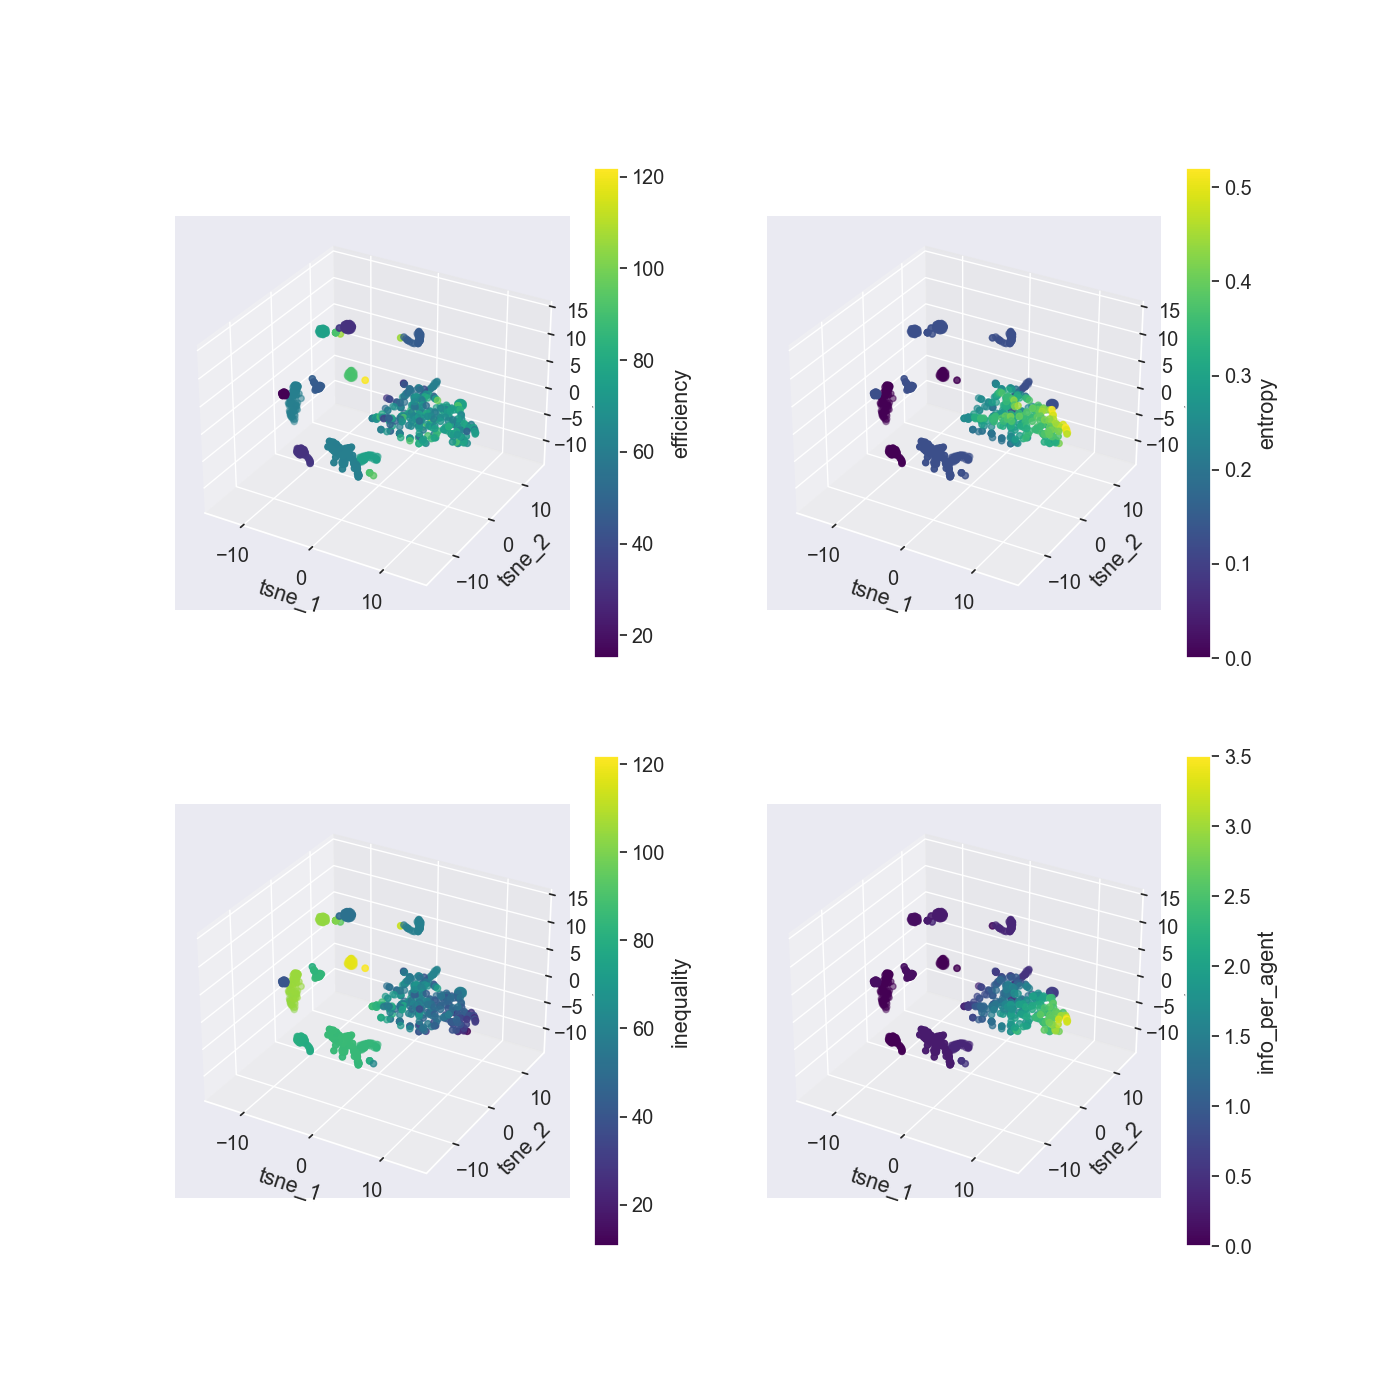

In [44]:
#3D plots

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1,projection='3d')
fig.add_axes(ax1)
sc1 = ax1.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab1], cmap='viridis')#, vmin=-200, vmax=200)
ax1.set_xlabel('tsne_1')
ax1.set_ylabel('tsne_2')
ax1.set_zlabel('tsne_3')
cbar1 = plt.colorbar(sc1)
cbar1.set_label(lab1)

ax2 = fig.add_subplot(2,2,2,projection='3d')
fig.add_axes(ax2)
sc2 = ax2.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab2], cmap='viridis')
ax2.set_xlabel('tsne_1')
ax2.set_ylabel('tsne_2')
ax2.set_zlabel('tsne_3')
cbar2 = plt.colorbar(sc2)
cbar2.set_label(lab2)

ax3 = fig.add_subplot(2,2,3,projection='3d')
fig.add_axes(ax3)
sc3 = ax3.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab3], cmap='viridis')
ax3.set_xlabel('tsne_1')
ax3.set_ylabel('tsne_2')
ax3.set_zlabel('tsne_3')
cbar3 = plt.colorbar(sc3)
cbar3.set_label(lab3)

ax4 = fig.add_subplot(2,2,4,projection='3d')
fig.add_axes(ax4)
sc4 = ax4.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab4], cmap='viridis')
ax4.set_xlabel('tsne_1')
ax4.set_ylabel('tsne_2')
ax4.set_zlabel('tsne_3')
cbar4 = plt.colorbar(sc4)
cbar4.set_label(lab4)



#plt.show()

In [45]:
#af = AffinityPropagation(damping=0.8,max_iter=3000,preference=-3, random_state=0).fit(X_dat)
#cluster_centers_indices = af.cluster_centers_indices_
#labels = af.labels_
#n_clusters = len(cluster_centers_indices)
#n_clusters, len(np.unique(labels))

In [46]:
##3D plot clustering
#lab = 'labels'

#fig0 = plt.figure(figsize=(8,8))
#ax = Axes3D(fig0)
#fig0.add_axes(ax)

#sc = ax.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=labels, cmap='Paired')#cmap='tab20')
#ax.set_xlabel('tsne_1')
#ax.set_ylabel('tsne_2')
#ax.set_zlabel('tsne_3')
#cbar = plt.colorbar(sc)
#cbar.set_label(lab)

##plt.show()